# Proyek Akhir: Menyelesaikan Permasalahan Pendidikan

- Nama: Irfan Wahyu Ramadhani
- Email: iramadhani679@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Menyiapkan data yang akan digunakan

### read table from dataset

In [2]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.
Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan

untuk keterangan dataset dapat dilihat pada link berikut:
https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/README.md

dari analisis penjelasan data yang digunakan, analisis terhadap kondisi finansial mahasiwa. analisis ini dimaksudkan apakah kondisi finansial mahasiswa memperngaruhi tingkat pengunduran diri atau tidak.


### Analisis Masalah
* faktor yang mempengaruhi tingginya Drop Out (pengunduran diri)
### Fokus yang dianalisis
* Status
* Debtor
* Tuition_fees_up_to_date
* Unemployment_rate
* Inflation_rate
* GDP

### Exploratory Data Analysis

#### Analysis Status Mahasiswa

`Status` mahasiswa ada 3 yaitu 'Graduate', 'Dropout', 'Enrolled'

C:\Users\Asus\AppData\Local\Temp\ipykernel_19348\4124816943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='viridis')


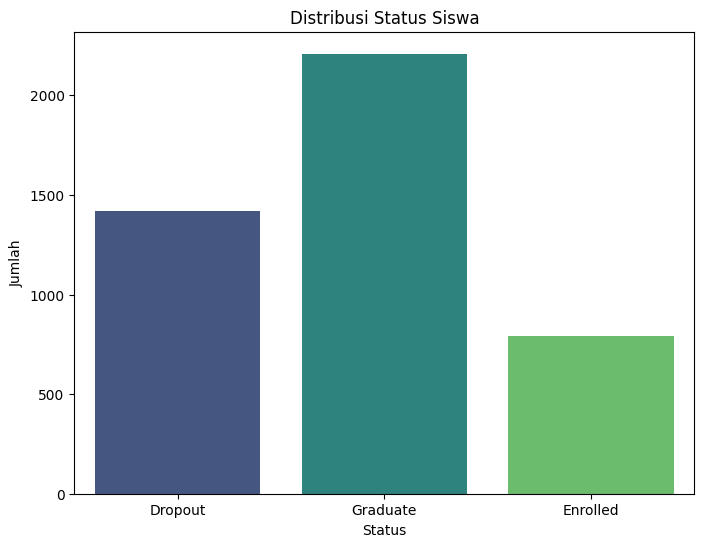

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Distribusi Status Siswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks(['Graduate', 'Dropout', 'Enrolled'])
plt.show()

sebaran data dari Status mahasiswa terbanyak adalah Graduate, disusul Dropout. tentu ini tidak bagus, karena dropout ada di urutan kedua dengan jumlah yang lumayan

#### Analysis jumlah mahasiswa yang memiliki hutang

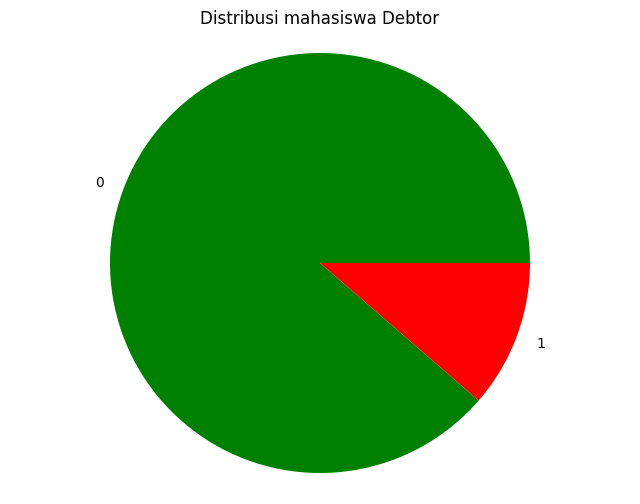

In [24]:
jml_debtor = df['Debtor'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(jml_debtor, labels=jml_debtor.index, colors=['g', 'r'])
plt.title('Distribusi mahasiswa Debtor')
plt.axis('equal')
plt.show()

ternyata lebih banyak mahasiswa yang tidak memiliki hutang

#### Analysis jumlah mahasiswa belum membayar uang kuliah tepat waktu

C:\Users\Asus\AppData\Local\Temp\ipykernel_19348\896865786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tuition_fees_up_to_date', data=df, palette='viridis')


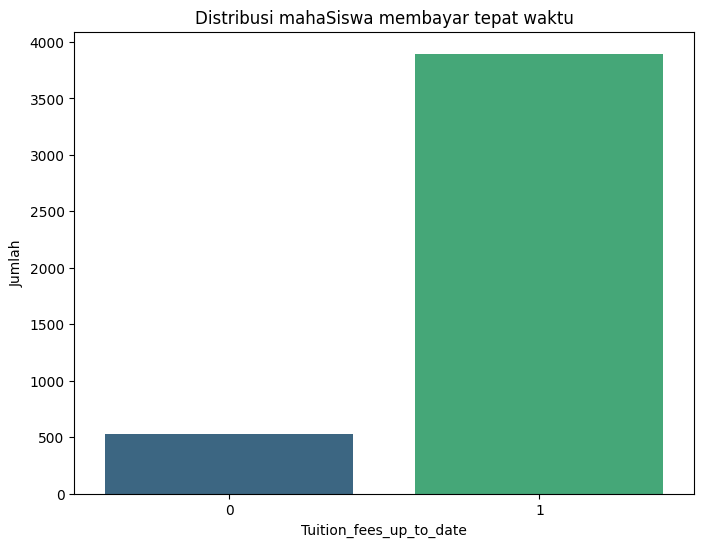

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tuition_fees_up_to_date', data=df, palette='viridis')
plt.title('Distribusi mahaSiswa membayar tepat waktu')
plt.xlabel('Tuition_fees_up_to_date')
plt.ylabel('Jumlah')
plt.show()

ternyata lebih banyak mahasiswa yang sudah membayar tepat waktu

#### Analysis jumlah mahasiswa yang menganggur

C:\Users\Asus\AppData\Local\Temp\ipykernel_19348\2238734082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Unemployment_rate', data=df, palette='viridis')


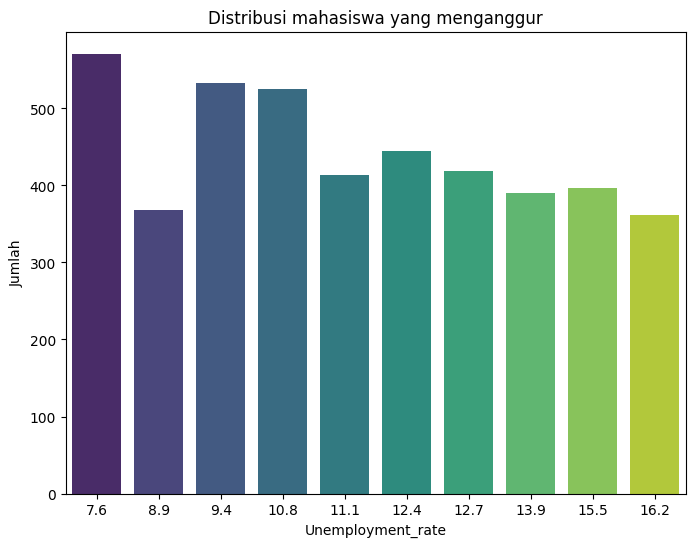

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Unemployment_rate', data=df, palette='viridis')
plt.title('Distribusi mahasiswa yang menganggur')
plt.xlabel('Unemployment_rate')
plt.ylabel('Jumlah')
plt.show()

ternyata tingkat pengangguran terbanyak adalah di rasio 7.6, tapi jumlah diatas 13.9 juga tinggi

#### Analysis jumlah mahasiswa yang terkendala inflasi keuangan

C:\Users\Asus\AppData\Local\Temp\ipykernel_19348\2037239309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Inflation_rate', data=df, palette='viridis')


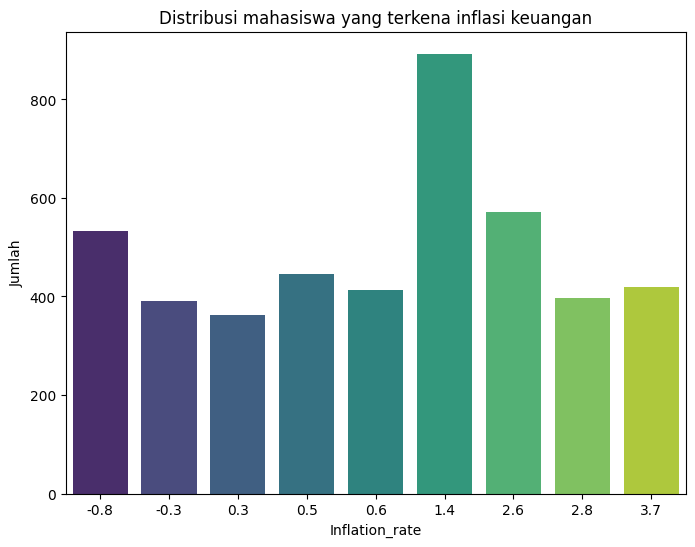

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Inflation_rate', data=df, palette='viridis')
plt.title('Distribusi mahasiswa yang terkena inflasi keuangan')
plt.xlabel('Inflation_rate')
plt.ylabel('Jumlah')
plt.show()

banyak mahasiswa yang terkena inflasi keuangan, terlihat banyak yang di nilai minus. tapi inflasi terbanyak di 1.4 yang menandakan tidak ada masalah inflasi (diatas 0.0)

#### Analysis jumlah mahasiswa terkait GDP

C:\Users\Asus\AppData\Local\Temp\ipykernel_19348\1683274430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GDP', data=df, palette='viridis')


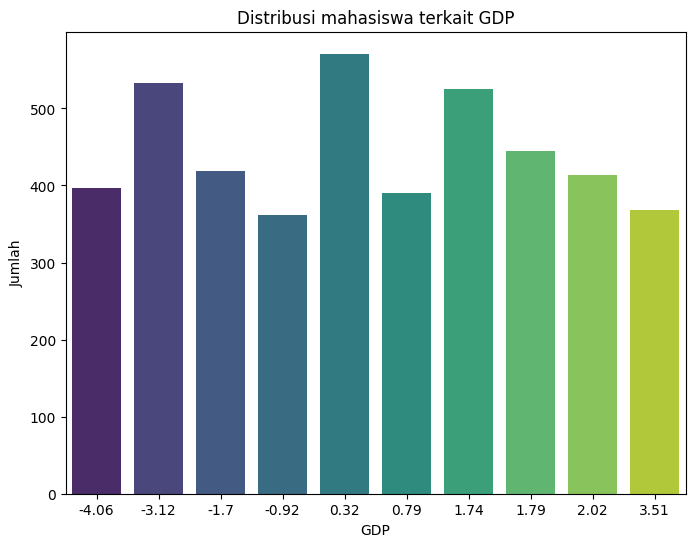

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='GDP', data=df, palette='viridis')
plt.title('Distribusi mahasiswa terkait GDP')
plt.xlabel('GDP')
plt.ylabel('Jumlah')
plt.show()

terlihat pendapapan GDP mahasiswa lumayan, karena rata-rata diatas 0.0. namun juga harus diperhatikan mahasiswa yang memiliki GDP dibawah 0.0

### check info from database

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

dataset tidak ada null value

## Data Preparation / Preprocessing

### Feature Selection


In [26]:
column = ['Status', 'Debtor', 'Tuition_fees_up_to_date', 'Unemployment_rate', 'Inflation_rate', 'GDP']
df = df[column]
df.head()

,Status,Debtor,Tuition_fees_up_to_date,Unemployment_rate,Inflation_rate,GDP
0,Dropout,0,1,10.8,1.4,1.74
1,Graduate,0,0,13.9,-0.3,0.79
2,Dropout,0,0,10.8,1.4,1.74
3,Graduate,0,1,9.4,-0.8,-3.12
4,Graduate,0,1,13.9,-0.3,0.79


### check null value every columns

In [27]:
df.isna().sum()

Status                     0
Debtor                     0
Tuition_fees_up_to_date    0
Unemployment_rate          0
Inflation_rate             0
GDP                        0
dtype: int64

terlihat tidak ada kolom yang null

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Status                   4424 non-null   object 
 1   Debtor                   4424 non-null   int64  
 2   Tuition_fees_up_to_date  4424 non-null   int64  
 3   Unemployment_rate        4424 non-null   float64
 4   Inflation_rate           4424 non-null   float64
 5   GDP                      4424 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 207.5+ KB


### cek unique value at `Status`

In [29]:
unique_values = df['Status'].unique()
unique_values

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

ternyata ada 3 status pada mahasiswa

kolom status masih bertipe data object, akan diubah ke numerik, serta value Status `Enrolled` berarti dia berstatus mahasiswa, jadi masih belum jelas apakah akan dropout atau tidak, jadi kita akan abaikan data dengan value `Enrolled`

### change type data `Status` to numeric

In [30]:
df['Status'] = df['Status'].astype(str)
df = df.drop(df[df['Status'] == 'Enrolled'].index)
df['Status'] = df['Status'].map({'Dropout': 1, 'Graduate': 0})
df['Status'] = df['Status'].astype(int)

df.head()

,Status,Debtor,Tuition_fees_up_to_date,Unemployment_rate,Inflation_rate,GDP
0,1,0,1,10.8,1.4,1.74
1,0,0,0,13.9,-0.3,0.79
2,1,0,0,10.8,1.4,1.74
3,0,0,1,9.4,-0.8,-3.12
4,0,0,1,13.9,-0.3,0.79


In [31]:
unique_values = df['Status'].unique()
unique_values

array([1, 0])

kolom `Status` kini hanya memiliki dua value yaitu dropout dan graduate

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Status                   3630 non-null   int32  
 1   Debtor                   3630 non-null   int64  
 2   Tuition_fees_up_to_date  3630 non-null   int64  
 3   Unemployment_rate        3630 non-null   float64
 4   Inflation_rate           3630 non-null   float64
 5   GDP                      3630 non-null   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 184.3 KB


### check data, apakah label mengalami under atau over sampling

C:\Users\Asus\AppData\Local\Temp\ipykernel_19348\1133738987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='viridis')


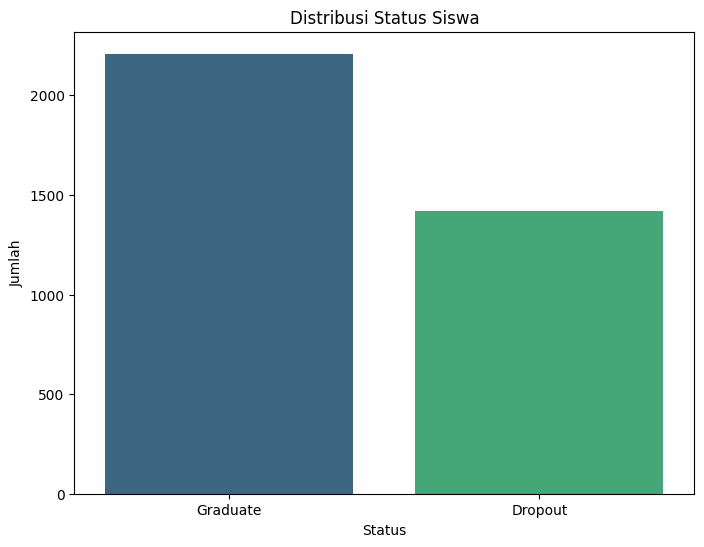

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Distribusi Status Siswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Graduate', 'Dropout'])
plt.show()

label data terlihat sedikit tidak sama, tapi jarak antara keduanya tidak terlalu jauh (tidak sampai setengah), jadi masih dianggap bagus

dataset sudah siap diproses

## Modeling

### Data Splitting

In [34]:
X = df.drop('Status', axis=1)
y = df['Status']

### standardize fitur

In [35]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train Model

In [37]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Cek Akurasi Model

In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.73
Confusion Matrix:
[[436  13]
 [180  97]]


### Tuning Model

In [40]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

#### Train Tuning Model

In [41]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=2)

In [42]:
print("Best parameter: ", grid_search.best_params_)

Best parameter:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


parameter terbaik yang digunakan pada best model

In [43]:
best_model = grid_search.best_estimator_

#### cek akurasi train, test dan confusion matrixnya

In [44]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Training accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")
print(f'Confusion Matrix:\n{conf_matrix}')


Training accuracy: 0.73
Test accuracy: 0.73
Confusion Matrix:
[[436  13]
 [180  97]]


### Predict

In [45]:
input_data = {
    'Debtor': [1],
    'Tuition_fees_up_to_date': [1],
    'Unemployment_rate': [5.0],
    'Inflation_rate': [0.0],
    'GDP': [1.5]
}

input_df = pd.DataFrame(input_data)

prediction = best_model.predict(input_df)

print(f"Prediction: {prediction[0]}")

Prediction: 0


f:\IDCAMP_DICODING\kelas_mahir\.env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


tampak bahwa akurasi train test tidak menunjukkan overfit atau underfit, jadi mungkin sudah bagus

### Save Model

In [46]:
# joblib.dump(best_model, 'decisiontree_model.joblib')

## Evaluation

### Kesimpulan

dari hasil evaluasi cluster dan modelling, dapat disimpulkan bahwa
* model memiliki akurasi yang cukup bagus, yaitu train serta test memiliki akurasi 73% dan tidak overfit maupun underfit.
* model yang tidak berpengaruh tingkat performanya walaupun sudah dituning.
* model siap digunakan untuk prediksi


# Saran pada satuan pendidikan

* memberikan beasiswa pada mahasiswa yang bermasalah terkait finansial,
* memberikan keringanan terkait UKT (biaya pendidikan kuliah) pada mahasiswa yang terkena masalah finansial,
* menambah jangka waktu pembayaran UKT (biaya pendidikan kuliah).


semua saran bertujuan untuk meringankan mahasiswa terkait finansial, sehingga tidak terbebani terkait biaya kuliah, dan bisa berdampak pada menurunnya dropout (pengunduran diri).